In [49]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\stagner\anaconda3\envs\bcs\lib\site-packages (0.0)


In [50]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Read the CSV and Perform Basic Data Cleaning

In [53]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [54]:
# Check the information for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [55]:
# Group the categorical, continuous, and boolean variables.
cat_var = ["koi_tce_plnt_num", "koi_steff_err1", "koi_steff_err2"]
cont_var = []
boolean_var = ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec"]

df.koi_steff_err2.astype("category").cat.categories

Int64Index([-1733, -1519, -1044,  -941,  -925,  -844,  -758,  -575,  -542,
             -530,
            ...
              -44,   -43,   -42,   -41,   -40,   -37,   -33,   -25,   -24,
                0],
           dtype='int64', length=354)

In [56]:
# Filter the variables.
filter_df = df.copy()
filter_df = filter_df.drop(columns= cat_var)
filter_df = filter_df.drop(columns= boolean_var)
filter_df = filter_df.drop(columns= ["koi_disposition"])
cont_var = list(filter_df.columns)

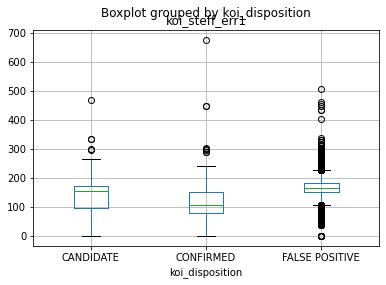

In [57]:
# Plot the KOI Disposition observations.
df.boxplot(column="koi_steff_err1", by="koi_disposition")

In [58]:
from scipy.stats import kruskal

In [38]:
for variable in cont_var:
    sample_by_group = []
    sample_by_group.append(df[variable][df.koi_disposition == "CONFIRMED"])
    sample_by_group.append(df[variable][df.koi_disposition == "CANDIDATE"])
    sample_by_group.append(df[variable][df.koi_disposition == "FALSE POSITIVE"])


    stat, p = kruskal(*sample_by_group)
    print("Variable: {} pvalue: {:.6f}".format(variable, p))

Variable: koi_period pvalue: 0.000000
Variable: koi_period_err1 pvalue: 0.000000
Variable: koi_period_err2 pvalue: 0.000000
Variable: koi_time0bk pvalue: 0.000000
Variable: koi_time0bk_err1 pvalue: 0.000000
Variable: koi_time0bk_err2 pvalue: 0.000000
Variable: koi_impact pvalue: 0.000000
Variable: koi_impact_err1 pvalue: 0.000410
Variable: koi_impact_err2 pvalue: 0.000000
Variable: koi_duration pvalue: 0.000000
Variable: koi_duration_err1 pvalue: 0.000000
Variable: koi_duration_err2 pvalue: 0.000000
Variable: koi_depth pvalue: 0.000000
Variable: koi_depth_err1 pvalue: 0.000000
Variable: koi_depth_err2 pvalue: 0.000000
Variable: koi_prad pvalue: 0.000000
Variable: koi_prad_err1 pvalue: 0.000000
Variable: koi_prad_err2 pvalue: 0.000000
Variable: koi_teq pvalue: 0.000000
Variable: koi_insol pvalue: 0.000000
Variable: koi_insol_err1 pvalue: 0.000000
Variable: koi_insol_err2 pvalue: 0.000000
Variable: koi_model_snr pvalue: 0.000000
Variable: koi_steff pvalue: 0.000000
Variable: koi_slogg pv

In [59]:
for variable in list(df.columns):
    if "err" in variable:
        df = df.drop(columns=[variable])

In [64]:
df = df.drop(columns= boolean_var)

In [65]:
y = df.koi_disposition
df = df.drop(columns=["koi_disposition"])

AttributeError: 'DataFrame' object has no attribute 'koi_disposition'

In [66]:
scaler = MinMaxScaler()

for variable in list(df.columns):
    scaler.fit(df[variable].to_numpy().reshape(-1, 1))
    df[variable] = scaler.transform(df[variable].to_numpy().reshape(-1, 1))
df
    

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0.050570,0.031063,0.005813,0.031365,0.000563,0.000013,0.024082,8.303224e-07,0.002673,0.142857,0.211107,0.831296,0.004547,0.552405,0.733837,0.692702
1,0.018338,0.040928,0.009613,0.011673,0.007021,0.000072,0.037461,3.588016e-06,0.008251,0.000000,0.241179,0.845778,0.004219,0.784312,0.733360,0.700058
2,0.001379,0.036828,0.012658,0.016184,0.005237,0.000166,0.089400,8.147390e-05,0.055672,0.000000,0.237552,0.849539,0.003791,0.259712,0.742947,0.713365
3,0.002116,0.037781,0.006954,0.010750,0.000387,0.000013,0.090154,8.459789e-05,0.004341,0.000000,0.254628,0.825842,0.005208,0.406994,0.739203,0.706091
4,0.003618,0.038804,0.007559,0.021487,0.000440,0.000013,0.073276,3.906169e-05,0.004264,0.142857,0.255761,0.834869,0.004797,0.751443,0.739105,0.723035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0.007778,0.008506,0.007589,0.033525,0.000052,0.000005,0.057427,1.611136e-05,0.000751,0.000000,0.224934,0.799135,0.005442,0.864094,0.659700,0.620878
6987,0.000250,0.008276,0.012420,0.022079,0.001020,0.000146,0.136947,4.110973e-04,0.049895,0.000000,0.224934,0.842957,0.004413,0.792725,0.667345,0.588148
6988,0.001382,0.009235,0.000427,0.021298,0.000027,0.000003,0.104014,1.448534e-04,0.000994,0.000000,0.261277,0.826970,0.005125,0.304294,0.671749,0.643938
6989,0.000394,0.008629,0.001458,0.005044,0.000062,0.000005,0.145866,5.218873e-04,0.001182,0.000000,0.265357,0.827534,0.005181,0.654426,0.672578,0.695843


In [11]:
X = df.koi_period.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[54.4183827 ],
       [19.89913995],
       [ 1.73695245],
       ...,
       [ 1.73984941],
       [ 0.68140161],
       [ 4.85603482]])

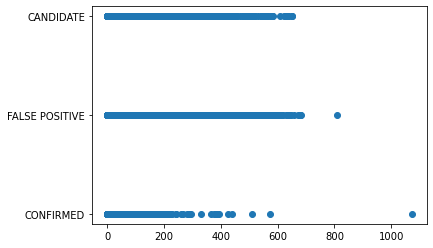

In [12]:
plt.scatter(X, y)

In [13]:
X = df.koi_time0bk.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[162.51384 ],
       [175.850252],
       [170.307565],
       ...,
       [133.00127 ],
       [132.18175 ],
       [135.9933  ]])

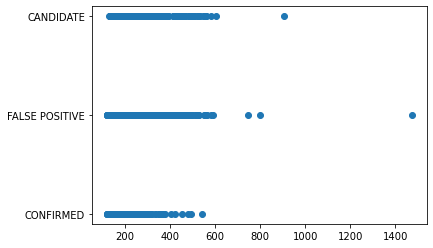

In [14]:
plt.scatter(X, y)

In [15]:
X = df.koi_slogg.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[4.467],
       [4.544],
       [4.564],
       ...,
       [4.444],
       [4.447],
       [4.385]])

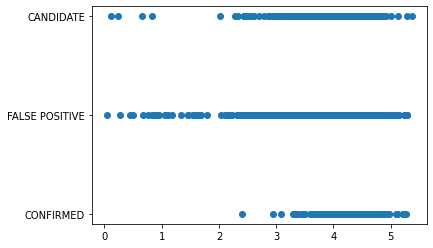

In [16]:
plt.scatter(X, y)

In [17]:
X = df.koi_srad.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[0.927],
       [0.868],
       [0.791],
       ...,
       [1.031],
       [1.041],
       [1.193]])

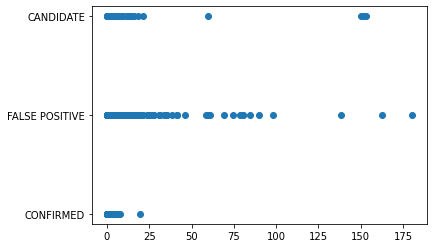

In [18]:
plt.scatter(X, y)

In [19]:
X = df.ra.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[291.93423],
       [297.00482],
       [285.53461],
       ...,
       [286.50937],
       [294.16489],
       [297.00977]])

# Select your features (columns)

In [ ]:
# Set features. This will also be used as your x values.
selected_features = df[['names', 'of', 'selected', 'features', 'here']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
# Scale your data

# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)